Artificial Neural Network

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

Loading the CSV file into data frame using pandas

In [ ]:
haemo_df = pd.read_csv('/content/Haemoglobin.csv')
haemo_df

,Age,Sex,Haemoglobin(g/dl),Normal,R.B.C count(Mill/Cumm),W.B.C count(/Cumm),Target/Outcome
0,33,M,14.4,13,4.79,5560,0
1,60,F,10.5,11,4.39,7260,1
2,25,F,13.0,11,4.30,11990,0
3,58,F,11.4,11,3.96,4560,0
4,43,M,18.0,13,5.89,15000,0
...,...,...,...,...,...,...,...
96,31,M,15.6,13,5.17,7430,0
97,50,M,16.6,13,5.56,6650,0
98,55,F,11.4,11,4.16,7000,0
99,15,M,15.4,13,5.60,3870,0


In [ ]:
print(haemo_df.columns)

Index(['Age', 'Sex', 'Haemoglobin(g/dl)', 'Normal ', 'R.B.C count(Mill/Cumm)',
       'W.B.C count(/Cumm)', 'Target/Outcome'],
      dtype='object')


In [ ]:
haemo_df['Sex'].replace('F', 0, inplace = True)
haemo_df['Sex'].replace('M', 1, inplace = True)
haemo_df

,Age,Sex,Haemoglobin(g/dl),Normal,R.B.C count(Mill/Cumm),W.B.C count(/Cumm),Target/Outcome
0,33,1,14.4,13,4.79,5560,0
1,60,0,10.5,11,4.39,7260,1
2,25,0,13.0,11,4.30,11990,0
3,58,0,11.4,11,3.96,4560,0
4,43,1,18.0,13,5.89,15000,0
...,...,...,...,...,...,...,...
96,31,1,15.6,13,5.17,7430,0
97,50,1,16.6,13,5.56,6650,0
98,55,0,11.4,11,4.16,7000,0
99,15,1,15.4,13,5.60,3870,0


Understanding the data

In [ ]:
haemo_df.shape

(101, 7)

In [ ]:
haemo_df.head()

,Age,Sex,Haemoglobin(g/dl),Normal,R.B.C count(Mill/Cumm),W.B.C count(/Cumm),Target/Outcome
0,33,1,14.4,13,4.79,5560,0
1,60,0,10.5,11,4.39,7260,1
2,25,0,13.0,11,4.30,11990,0
3,58,0,11.4,11,3.96,4560,0
4,43,1,18.0,13,5.89,15000,0


In [ ]:
haemo_df.tail()

,Age,Sex,Haemoglobin(g/dl),Normal,R.B.C count(Mill/Cumm),W.B.C count(/Cumm),Target/Outcome
96,31,1,15.6,13,5.17,7430,0
97,50,1,16.6,13,5.56,6650,0
98,55,0,11.4,11,4.16,7000,0
99,15,1,15.4,13,5.60,3870,0
100,40,1,12.6,13,3.88,4020,0


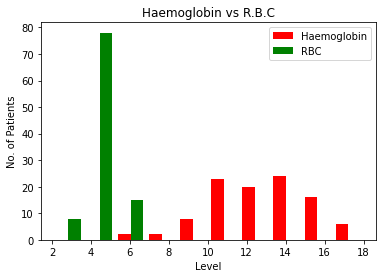

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
h1 = haemo_df['Haemoglobin(g/dl)']
h2 = haemo_df['R.B.C count(Mill/Cumm)']
legend = ['Haemoglobin', 'RBC']
plt.hist([h1,h2], color = ['red','green'])
plt.xlabel('Level')
plt.ylabel('No. of Patients')
plt.legend(legend)
plt.title('Haemoglobin vs R.B.C')
plt.show()

In [ ]:
haemo_df.describe()

,Age,Sex,Haemoglobin(g/dl),Normal,R.B.C count(Mill/Cumm),W.B.C count(/Cumm),Target/Outcome
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,41.217822,0.524752,12.790099,12.049505,4.570297,7901.207921,0.306931
std,17.755339,0.501878,2.411659,1.003755,0.655403,3112.477432,0.463521
min,2.000000,0.000000,6.300000,11.000000,2.050000,1582.000000,0.000000
25%,30.000000,0.000000,11.100000,11.000000,4.160000,6320.000000,0.000000
50%,36.000000,1.000000,12.800000,13.000000,4.660000,7480.000000,0.000000
75%,53.000000,1.000000,14.700000,13.000000,5.000000,9100.000000,1.000000
max,87.000000,1.000000,18.000000,13.000000,5.890000,19530.000000,1.000000


Negative(0):  70
Positive(1):  31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


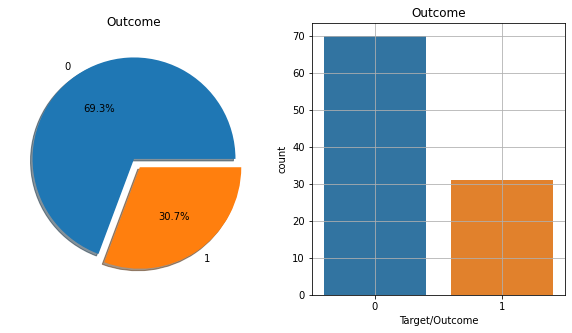

In [ ]:
f, ax = plt.subplots(1,2,figsize = (10,5))
haemo_df['Target/Outcome'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Target/Outcome', data = haemo_df, ax = ax[1])
ax[1].set_title('Outcome')
N, P = haemo_df['Target/Outcome'].value_counts()
print('Negative(0): ', N)
print('Positive(1): ', P)
plt.grid()
plt.show()

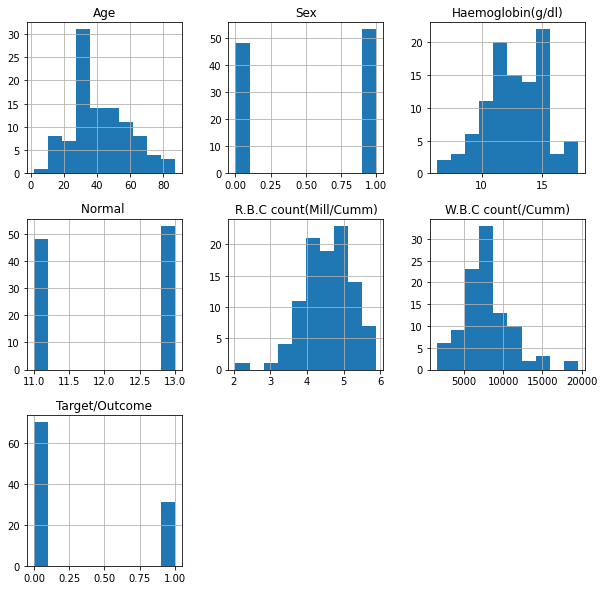

In [ ]:
haemo_df.hist(bins = 10, figsize = (10,10))
plt.show()

In [ ]:
correlation = haemo_df.corr()

In [ ]:
correlation

,Age,Sex,Haemoglobin(g/dl),Normal,R.B.C count(Mill/Cumm),W.B.C count(/Cumm),Target/Outcome
Age,1.000000,-0.051110,-0.122789,-0.051110,-0.243180,0.154116,0.011236
Sex,-0.051110,1.000000,0.666949,1.000000,0.473479,-0.096167,-0.312398
Haemoglobin(g/dl),-0.122789,0.666949,1.000000,0.666949,0.753990,-0.146065,-0.725435
Normal,-0.051110,1.000000,0.666949,1.000000,0.473479,-0.096167,-0.312398
R.B.C count(Mill/Cumm),-0.243180,0.473479,0.753990,0.473479,1.000000,-0.212262,-0.517761
W.B.C count(/Cumm),0.154116,-0.096167,-0.146065,-0.096167,-0.212262,1.000000,0.117437
Target/Outcome,0.011236,-0.312398,-0.725435,-0.312398,-0.517761,0.117437,1.000000


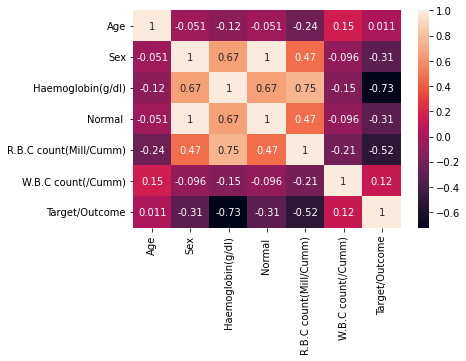

In [ ]:
sns.heatmap(correlation, annot = True)

Splitting the Target and other columns

In [ ]:
x = haemo_df.drop(columns = 'Target/Outcome', axis = 1)
y = haemo_df['Target/Outcome']

In [ ]:
print(x)

     Age  Sex  Haemoglobin(g/dl)  Normal   R.B.C count(Mill/Cumm)  \
0     33    1               14.4       13                    4.79   
1     60    0               10.5       11                    4.39   
2     25    0               13.0       11                    4.30   
3     58    0               11.4       11                    3.96   
4     43    1               18.0       13                    5.89   
..   ...  ...                ...      ...                     ...   
96    31    1               15.6       13                    5.17   
97    50    1               16.6       13                    5.56   
98    55    0               11.4       11                    4.16   
99    15    1               15.4       13                    5.60   
100   40    1               12.6       13                    3.88   

     W.B.C count(/Cumm)  
0                  5560  
1                  7260  
2                 11990  
3                  4560  
4                 15000  
..             

In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Name: Target/Outcome, Length: 101, dtype: int64


Splitting the data into Training data and Test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(101, 6) (80, 6) (21, 6)


In [ ]:
print(x_train)

    Age  Sex  Haemoglobin(g/dl)  Normal   R.B.C count(Mill/Cumm)  \
62   30    1               14.1       13                    4.96   
3    58    0               11.4       11                    3.96   
71   30    1               14.5       13                    4.19   
45   33    1               15.0       13                    5.10   
48   52    0               12.2       11                    4.20   
..  ...  ...                ...      ...                     ...   
97   50    1               16.6       13                    5.56   
67   75    0               13.9       11                    4.65   
64   22    0                8.2       11                    3.82   
47   33    1               14.7       13                    4.77   
44   33    1               14.9       13                    5.00   

    W.B.C count(/Cumm)  
62                4090  
3                 4560  
71                6650  
45                6800  
48                5670  
..                 ...  
97      

In [ ]:
print(x_test)

    Age  Sex  Haemoglobin(g/dl)  Normal   R.B.C count(Mill/Cumm)  \
26   33    1               16.9       13                    5.48   
86   15    1               13.3       13                    4.84   
2    25    0               13.0       11                    4.30   
55   33    1               17.3       13                    5.56   
75   30    1               15.5       13                    5.42   
94   35    0               10.4       11                    3.51   
16   12    0               10.1       11                    5.17   
73   40    0               11.6       11                    4.34   
54   34    0                9.7       11                    4.48   
96   31    1               15.6       13                    5.17   
53   19    0               10.8       11                    2.86   
93   65    1               15.5       13                    5.04   
78   31    0               11.7       11                    4.53   
13   87    1               12.8       13        

Fitting and Evaluation

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-6.88406567e-01  9.27612590e-01  5.82230281e-01  9.27612590e-01
   6.22218465e-01 -1.17216656e+00]
 [ 9.07898516e-01 -1.07803625e+00 -5.47704496e-01 -1.07803625e+00
  -9.46070041e-01 -1.01826910e+00]
 [-6.88406567e-01  9.27612590e-01  7.49628026e-01  9.27612590e-01
  -5.85363685e-01 -3.33916561e-01]
 [-5.17373880e-01  9.27612590e-01  9.58875206e-01  9.27612590e-01
   8.41778855e-01 -2.84800350e-01]
 [ 5.65833141e-01 -1.07803625e+00 -2.12909007e-01 -1.07803625e+00
  -5.69680800e-01 -6.54809140e-01]
 [ 1.30697479e+00 -1.07803625e+00 -6.73252805e-01 -1.07803625e+00
  -8.83338501e-01  2.22733831e-01]
 [-1.18297609e-01  9.27612590e-01 -4.55112618e-02  9.27612590e-01
  -1.07153312e+00 -1.19508746e+00]
 [ 1.36398568e+00  9.27612590e-01  5.40380845e-01  9.27612590e-01
   6.84950005e-01 -3.83032772e-01]
 [-2.28471165e+00 -1.07803625e+00 -1.29210134e-01 -1.07803625e+00
   1.51731913e-01  1.01186762e+00]
 [-4.03352088e-01  9.27612590e-01  9.17025770e-01  9.27612590e-01
   9.98607706e-01  4.0282

In [ ]:
print(x_test)

[[-0.51737388  0.92761259  1.75401449  0.92761259  1.43772849 -0.78906012]
 [-1.54357     0.92761259  0.24743479  0.92761259  0.43402384 -0.41577691]
 [-0.97346105 -1.07803625  0.12188648 -1.07803625 -0.41285195  1.41462055]
 [-0.51737388  0.92761259  1.92141224  0.92761259  1.56319157  1.83374556]
 [-0.68840657  0.92761259  1.16812239  0.92761259  1.34363118  0.40937543]
 [-0.40335209 -1.07803625 -0.96619886 -1.07803625 -1.65179987 -0.57294879]
 [-1.71460269 -1.07803625 -1.09174717 -1.07803625  0.95155905 -0.95278082]
 [-0.11829761 -1.07803625 -0.46400562 -1.07803625 -0.35012041  0.18998969]
 [-0.46036298 -1.07803625 -1.25914491 -1.07803625 -0.13056002  0.46504047]
 [-0.63139567  0.92761259  1.20997182  0.92761259  0.95155905 -0.07851226]
 [-1.31552642 -1.07803625 -0.79880111 -1.07803625 -2.6711874  -0.36011187]
 [ 1.30697479  0.92761259  1.16812239  0.92761259  0.74768155  3.56263619]
 [-0.63139567 -1.07803625 -0.42215619 -1.07803625 -0.05214559  1.26727192]
 [ 2.5612145   0.92761259

Initialization ANN(Artificial Neural Network)

In [ ]:
#Initialising ANN
ann_haemo = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann_haemo.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Second Hidden Layer
ann_haemo.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Output Layer
ann_haemo.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann_haemo.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann_haemo.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
3/3 [==============================] - 2s 7ms/step - loss: 0.7244 - accuracy: 0.3125
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7204 - accuracy: 0.3125
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7163 - accuracy: 0.3250
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.7131 - accuracy: 0.3375
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7099 - accuracy: 0.3625
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7061 - accuracy: 0.3750
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7026 - accuracy: 0.4125
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6995 - accuracy: 0.5500
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6960 - accuracy: 0.6125
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.6375
Epoch 11/100
3/3 [===========

In [ ]:
y_log = ann_haemo.predict(x_test)

1/1 [==============================] - 0s 81ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
ann = accuracy_score(y_test, y_pred)
ann

0.8095238095238095

In [ ]:
ann_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of the Test data: " + str(round(ann_accuracy, 2))+ '%')

Accuracy of the Test data: 80.95%


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
# training the logistic regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# accuracy score
# training data trd
x_train_pred = model.predict(x_train)
trd_accuracy = accuracy_score(x_train_pred, y_train)*100
print("Accuracy of the Training data: " + str(round(trd_accuracy, 2))+ '%')

Accuracy of the Training data: 96.25%


In [ ]:
# test data ted
x_test_pred = model.predict(x_test)
ted_accuracy = accuracy_score(x_test_pred, y_test)*100
print("Accuracy of the Test data: " + str(round(ted_accuracy, 2)) + '%')

Accuracy of the Test data: 95.24%


In [ ]:
input_data = (25, 1, 14.1, 13, 4.54, 6490) # 37th record

# input data -> numpy array
ip_data_np_arr = np.asarray(input_data)

# reshaping the array
ip_data_reshaped = ip_data_np_arr.reshape(1, -1)

pred = model.predict(ip_data_reshaped)
print(pred)

[1]


SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
sc = StandardScaler()

In [ ]:
# training the model with training dataset
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train)

[[-6.88406567e-01  9.27612590e-01  5.82230281e-01  9.27612590e-01
   6.22218465e-01 -1.17216656e+00]
 [ 9.07898516e-01 -1.07803625e+00 -5.47704496e-01 -1.07803625e+00
  -9.46070041e-01 -1.01826910e+00]
 [-6.88406567e-01  9.27612590e-01  7.49628026e-01  9.27612590e-01
  -5.85363685e-01 -3.33916561e-01]
 [-5.17373880e-01  9.27612590e-01  9.58875206e-01  9.27612590e-01
   8.41778855e-01 -2.84800350e-01]
 [ 5.65833141e-01 -1.07803625e+00 -2.12909007e-01 -1.07803625e+00
  -5.69680800e-01 -6.54809140e-01]
 [ 1.30697479e+00 -1.07803625e+00 -6.73252805e-01 -1.07803625e+00
  -8.83338501e-01  2.22733831e-01]
 [-1.18297609e-01  9.27612590e-01 -4.55112618e-02  9.27612590e-01
  -1.07153312e+00 -1.19508746e+00]
 [ 1.36398568e+00  9.27612590e-01  5.40380845e-01  9.27612590e-01
   6.84950005e-01 -3.83032772e-01]
 [-2.28471165e+00 -1.07803625e+00 -1.29210134e-01 -1.07803625e+00
   1.51731913e-01  1.01186762e+00]
 [-4.03352088e-01  9.27612590e-01  9.17025770e-01  9.27612590e-01
   9.98607706e-01  4.0282

In [ ]:
print(x_test)

[[-0.27874125  1.04880885  1.57476418  1.04880885  1.25395648 -1.13587369]
 [-1.29185848  1.04880885  0.08288233  1.04880885  0.34493949 -0.76830386]
 [-0.72901558 -0.95346259 -0.04144116 -0.95346259 -0.42204361  1.03407803]
 [-0.27874125  1.04880885  1.74052884  1.04880885  1.36758361  1.44678802]
 [-0.44759412  1.04880885  0.99458791  1.04880885  1.16873614  0.04421893]
 [-0.16617267 -0.95346259 -1.11891139 -0.95346259 -1.54411146 -0.9230701 ]
 [-1.46071135 -0.95346259 -1.24323488 -0.95346259  0.81365138 -1.29708853]
 [ 0.11524879 -0.95346259 -0.62161744 -0.95346259 -0.36523004 -0.17180896]
 [-0.22245696 -0.95346259 -1.40899953 -0.95346259 -0.16638258  0.09903197]
 [-0.39130983  1.04880885  1.03602907  1.04880885  0.81365138 -0.43620129]
 [-1.06672132 -0.95346259 -0.95314674 -0.95346259 -2.46733185 -0.71349081]
 [ 1.52235605  1.04880885  0.99458791  1.04880885  0.6290073   3.14921671]
 [-0.39130983 -0.95346259 -0.58017628 -0.95346259 -0.09536562  0.88898468]
 [ 2.76061045  1.04880885

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
xtrain_svm_pred = svc.predict(x_train)

In [ ]:
xtrain_svm_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
confusion_matrix(y_train, xtrain_svm_pred)

array([[54,  1],
       [ 3, 22]])

In [ ]:
accuracy_score(y_train, xtrain_svm_pred)
svm_train_accuracy = accuracy_score(y_train, xtrain_svm_pred)*100
print("Accuracy of training data is: " + str(round(svm_train_accuracy, 2)) + '%')

Accuracy of training data is: 95.0%


In [ ]:
xtest_svm_pred = svc.predict(x_test)
xtest_svm_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
confusion_matrix(y_test, xtest_svm_pred)

array([[14,  1],
       [ 1,  5]])

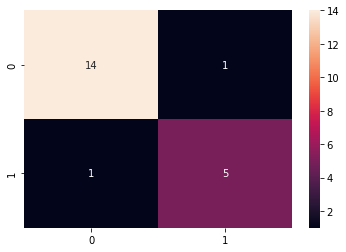

In [ ]:
sns.heatmap(confusion_matrix(y_test,xtest_svm_pred), annot = True, fmt = "d")

In [ ]:
accuracy_score(y_test, xtest_svm_pred)
svm_test_accuracy = accuracy_score(y_test, xtest_svm_pred)*100
print("Accuracy of the model or test data is: " + str(round(svm_test_accuracy, 2)) + '%')

Accuracy of the model or test data is: 90.48%


In [ ]:
input_data = (12, 0, 10.1, 11, 5.17, 4760) # 18th record

# input data -> numpy array
ip_data_np_arr = np.asarray(input_data)

# reshaping the array
ip_data_reshaped = ip_data_np_arr.reshape(1, -1)

pred = svc.predict(ip_data_reshaped)
print(pred)

[1]


Comparison between the three models

In [ ]:
model_compare = pd.DataFrame({"Artificial Neural Network":ann_accuracy,
                              "Logistic Regression":ted_accuracy,
                              "Support Vector Machine":svm_test_accuracy,}, index = ["accuracy"])
model_compare

,Artificial Neural Network,Logistic Regression,Support Vector Machine
accuracy,80.952381,95.238095,90.47619
